3JOH22A



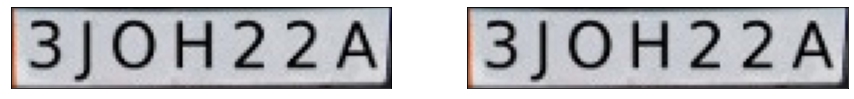

In [14]:
import cv2 
import pytesseract 
import matplotlib.pyplot as plt


pytesseract.pytesseract.tesseract_cmd = 'D:/Study/SEM 7/PROJECT/Number Plate Detection/tesseract.exe'


img = cv2.imread("D:/Study/SEM 7/PROJECT/Number Plate Detection/notebooks/plate.jpg") 
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)
plot_images(img,img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 


ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 


rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18)) 

# Appplying dilation on the threshold image 
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 

# Finding contours 
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) 

# Creating a copy of image 
im2 = img.copy() 



# A text file is created and flushed 
file = open("D:/Study/SEM 7/PROJECT/Number Plate Detection/notebooks/recognized.txt", "w+") 
file.write("") 
file.close() 


for cnt in contours: 
    x, y, w, h = cv2.boundingRect(cnt) 
    # Drawing a rectangle on copied image 
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2) 
    
    # Cropping the text block for giving input to OCR 
    cropped = im2[y:y + h, x:x + w] 
    
    # Open the file in append mode 
    file = open("D:/Study/SEM 7/PROJECT/Number Plate Detection/notebooks/recognized.txt", "a") 
    
    # Apply OCR on the cropped image 
    text = pytesseract.image_to_string(img) 
    print(text)
    # Appending the text into file 
    file.write(text) 
    file.write("\n") 
    
    # Close the file 
    file.close 
